# USE: Movie Review Sentiment Analysis Using Universal Sentence Encoder

**Dataset**

IMDB dataset has 50K movie reviews for natural language processing.
Please download the dataset from [Kaggle link for IMDB master](https://www.kaggle.com/uttam94/imdb-mastercsv) and preprocess the data. Use the column "type" to seperate training and test datasets if needed as used in this case.

**Problem**

A review in the IMDB dataset is either positive or negative. Therefore, the NLP movie review sentiment analysis task is a supervised learning binary classification problem.

**Settings and Features**

All the runs described in 1-2 have full run and test run. In a test run, only a small number of data is used to test workflow and used as debuging purpose.

1. __k-fold cross-validation (CV)__: Specify fold number, run k-fold CV. The following outputs are created: 
    - k folds models (.h5) are created
    - k folds evaluation files are created
    - k folds probability files are created
    - Peformance summary resport including mean accuracy and std are created (not persisted)
    
2. __Evalute on 25k full test dataset against all folds__. SSNet uses these probability files to get the final results. The following outputs are created:
    - 25k test on k folds evaluation files are created
    - 25k test on k folds probability files are created
    - Peformance summary report on 25k test dataset including mean accuracy and std are created (not persisted) 

In [1]:
# Enable intellisense
%config IPCompleter.greedy=True

In [2]:
# Import modules
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import  Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from tqdm import tqdm
import matplotlib.pyplot as plt


## from ssnet
from keras.layers import BatchNormalization, InputLayer, RepeatVector
from keras.layers import Dense, Activation, Dropout, Input, LSTM, Flatten

print("TensorFlow Version:",tf.__version__)
print("Hub version: ",hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")
pd.set_option('display.max_colwidth',1000)

import importlib

TensorFlow Version: 2.2.0
Hub version:  0.9.0
GPU is available


In [3]:
import sys
sys.path.append("./helpers")
import imdb_preprocess_functions as imdb
dir(imdb)
sys.path.append("../model_helpers")
import model_utils as model_utils

## USE functions
sys.path.append("../use_helpers")
import use_functions as iUse

In [4]:
importlib.reload(model_utils)
importlib.reload(iUse)
importlib.reload(imdb)

<module 'imdb_preprocess_functions' from './helpers/imdb_preprocess_functions.py'>

## Data preprocessing

In [5]:
# Load imdb master data, return 25K train and 25K test datasets
[df_train, df_test] = imdb.get_imdb_df_data()

The number of rows and columns in the training dataset is: (25000, 5)
Missing values in train dataset:
Unnamed: 0    0
type          0
review        0
label         0
file          0
dtype: int64
Check train class balance
1.0    12500
0.0    12500
Name: label, dtype: int64
The number of rows and columns in the test dataset is: (25000, 5)
Missing values in test dataset:
Unnamed: 0    0
type          0
review        0
label         0
file          0
dtype: int64
Check test class balance
1.0    12500
0.0    12500
Name: label, dtype: int64


In [6]:
# # Define test size for test run. Un-comment for test run
# test_size = 300
# # Get test run data for quick run
# [df_train, df_test] = imdb.get_test_run_data(df_train, df_test, test_size)

In [7]:
# k-fold cross validation. k = 5
n_folds = 5

label
0.0      2517
1.0      2483
dtype: int64
Current model: ../model_ouput/use/model_use_fold_1_tr20000_7.h5
Epoch 1/7
4000/4000 [==============================] - 238s 60ms/step - loss: 0.5335 - accuracy: 0.7546 - val_loss: 0.3443 - val_accuracy: 0.8598
Epoch 2/7
4000/4000 [==============================] - 238s 59ms/step - loss: 0.3238 - accuracy: 0.8696 - val_loss: 0.2945 - val_accuracy: 0.8788
Epoch 3/7
4000/4000 [==============================] - 238s 59ms/step - loss: 0.2502 - accuracy: 0.9044 - val_loss: 0.2783 - val_accuracy: 0.8882
Epoch 4/7
4000/4000 [==============================] - 238s 60ms/step - loss: 0.1957 - accuracy: 0.9298 - val_loss: 0.2752 - val_accuracy: 0.8904
Epoch 5/7
4000/4000 [==============================] - 238s 59ms/step - loss: 0.1457 - accuracy: 0.9493 - val_loss: 0.2788 - val_accuracy: 0.8930
Epoch 6/7
4000/4000 [==============================] - 238s 59ms/step - loss: 0.1063 - accuracy: 0.9661 - val_loss: 0.2889 - val_accuracy: 0.8946
Epoch 7/7
400

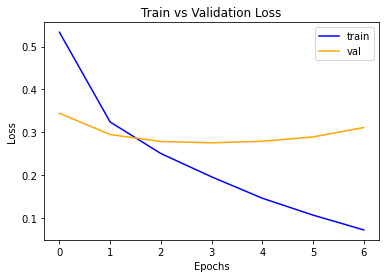

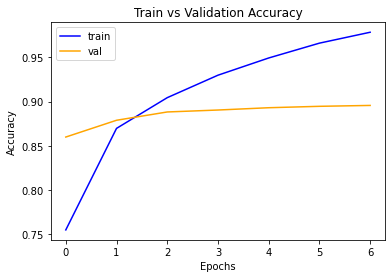

Evaluate model: ../model_ouput/use/model_use_fold_1_tr20000_7.h5
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3108 - accuracy: 0.8956
results are: 
[0.3108097016811371, 0.8956000208854675]
              precision    recall  f1-score   support

           0     0.9011    0.8903    0.8957      2517
           1     0.8902    0.9009    0.8955      2483

    accuracy                         0.8956      5000
   macro avg     0.8956    0.8956    0.8956      5000
weighted avg     0.8957    0.8956    0.8956      5000

> 89.560
label
0.0      2527
1.0      2473
dtype: int64
Current model: ../model_ouput/use/model_use_fold_2_tr20000_7.h5
Epoch 1/7
4000/4000 [==============================] - 240s 60ms/step - loss: 0.5187 - accuracy: 0.7687 - val_loss: 0.3515 - val_accuracy: 0.8506
Epoch 2/7
4000/4000 [==============================] - 240s 60ms/step - loss: 0.3123 - accuracy: 0.8741 - val_loss: 0.3021 - val_accuracy: 0.8730
Epoch 3/7
4000/4000 [=============================

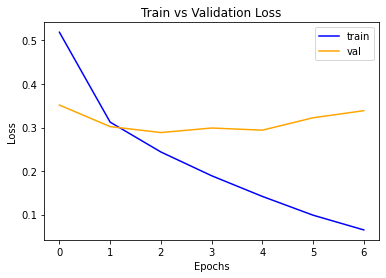

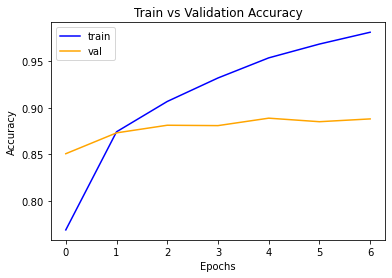

Evaluate model: ../model_ouput/use/model_use_fold_2_tr20000_7.h5
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3386 - accuracy: 0.8880
results are: 
[0.33864057064056396, 0.8880000114440918]
              precision    recall  f1-score   support

           0     0.8993    0.8765    0.8878      2527
           1     0.8770    0.8997    0.8882      2473

    accuracy                         0.8880      5000
   macro avg     0.8882    0.8881    0.8880      5000
weighted avg     0.8883    0.8880    0.8880      5000

> 88.800
label
1.0      2511
0.0      2489
dtype: int64
Current model: ../model_ouput/use/model_use_fold_3_tr20000_7.h5
Epoch 1/7
4000/4000 [==============================] - 240s 60ms/step - loss: 0.5247 - accuracy: 0.7623 - val_loss: 0.3501 - val_accuracy: 0.8530
Epoch 2/7
4000/4000 [==============================] - 239s 60ms/step - loss: 0.3182 - accuracy: 0.8709 - val_loss: 0.3000 - val_accuracy: 0.8746
Epoch 3/7
4000/4000 [============================

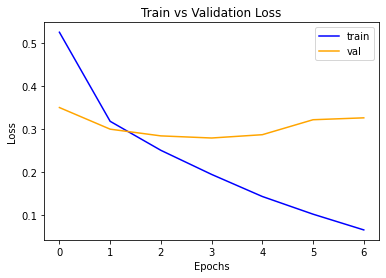

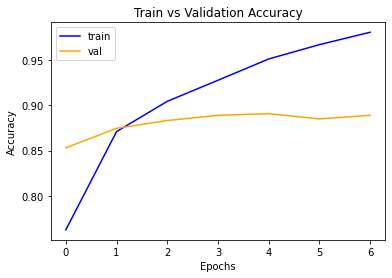

Evaluate model: ../model_ouput/use/model_use_fold_3_tr20000_7.h5
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3263 - accuracy: 0.8890
results are: 
[0.3262541592121124, 0.8889999985694885]
              precision    recall  f1-score   support

           0     0.8960    0.8791    0.8874      2489
           1     0.8823    0.8988    0.8905      2511

    accuracy                         0.8890      5000
   macro avg     0.8892    0.8890    0.8890      5000
weighted avg     0.8891    0.8890    0.8890      5000

> 88.900
label
1.0      2563
0.0      2437
dtype: int64
Current model: ../model_ouput/use/model_use_fold_4_tr20000_7.h5
Epoch 1/7
4000/4000 [==============================] - 241s 60ms/step - loss: 0.5394 - accuracy: 0.7585 - val_loss: 0.3597 - val_accuracy: 0.8484
Epoch 2/7
4000/4000 [==============================] - 240s 60ms/step - loss: 0.3195 - accuracy: 0.8719 - val_loss: 0.3196 - val_accuracy: 0.8616
Epoch 3/7
4000/4000 [=============================

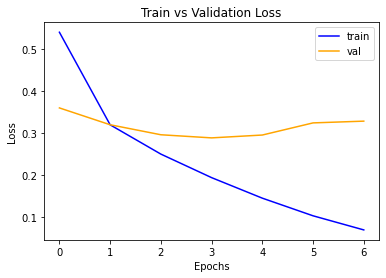

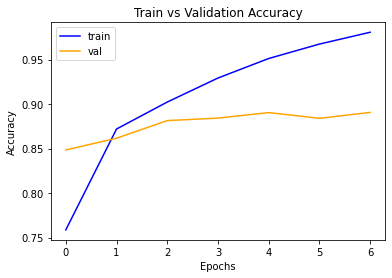

Evaluate model: ../model_ouput/use/model_use_fold_4_tr20000_7.h5
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3282 - accuracy: 0.8906
results are: 
[0.3282372057437897, 0.8906000256538391]
              precision    recall  f1-score   support

           0     0.8814    0.8962    0.8887      2437
           1     0.8997    0.8853    0.8924      2563

    accuracy                         0.8906      5000
   macro avg     0.8905    0.8907    0.8906      5000
weighted avg     0.8908    0.8906    0.8906      5000

> 89.060
label
0.0      2530
1.0      2470
dtype: int64
Current model: ../model_ouput/use/model_use_fold_5_tr20000_7.h5
Epoch 1/7
4000/4000 [==============================] - 241s 60ms/step - loss: 0.5256 - accuracy: 0.7618 - val_loss: 0.3552 - val_accuracy: 0.8488
Epoch 2/7
4000/4000 [==============================] - 240s 60ms/step - loss: 0.3189 - accuracy: 0.8719 - val_loss: 0.3041 - val_accuracy: 0.8716
Epoch 3/7
4000/4000 [=============================

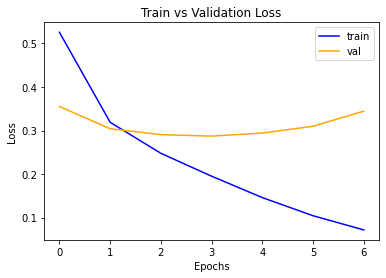

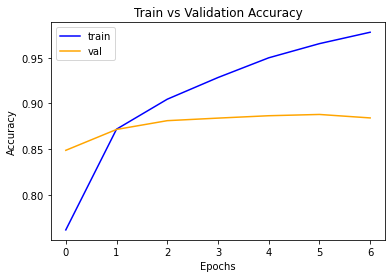

Evaluate model: ../model_ouput/use/model_use_fold_5_tr20000_7.h5
1000/1000 [==============================] - 9s 9ms/step - loss: 0.3445 - accuracy: 0.8842
results are: 
[0.3445347547531128, 0.8841999769210815]
              precision    recall  f1-score   support

           0     0.9171    0.8478    0.8811      2530
           1     0.8553    0.9215    0.8872      2470

    accuracy                         0.8842      5000
   macro avg     0.8862    0.8846    0.8841      5000
weighted avg     0.8866    0.8842    0.8841      5000

> 88.420


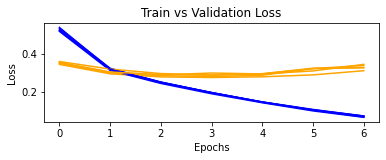

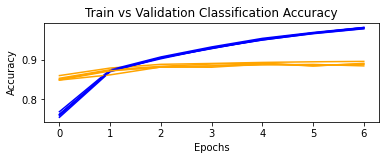

Accuracy: mean=88.948 std=0.372, n=5


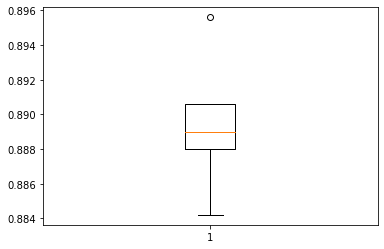

In [8]:
iUse.run_k_fold_cv(df_train, n_folds,)

20000
../model_ouput/use/model_use_fold_1_tr20000_7.h5
5000/5000 [==============================] - 45s 9ms/step - loss: 0.3422 - accuracy: 0.8813
results are: 
[0.34218329191207886, 0.8813199996948242]
              precision    recall  f1-score   support

           0     0.8812    0.8815    0.8813     12500
           1     0.8815    0.8811    0.8813     12500

    accuracy                         0.8813     25000
   macro avg     0.8813    0.8813    0.8813     25000
weighted avg     0.8813    0.8813    0.8813     25000

> 88.132
../model_ouput/use/model_use_fold_2_tr20000_7.h5
5000/5000 [==============================] - 45s 9ms/step - loss: 0.3516 - accuracy: 0.8829
results are: 
[0.3516181707382202, 0.8829200267791748]
              precision    recall  f1-score   support

           0     0.8858    0.8792    0.8825     12500
           1     0.8801    0.8866    0.8834     12500

    accuracy                         0.8829     25000
   macro avg     0.8829    0.8829    0.8829    

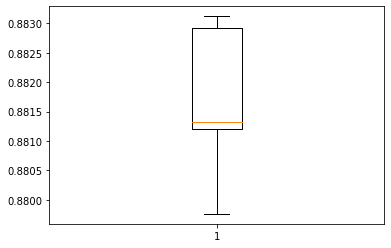

In [9]:
x_test, y_test, df_fit_test = iUse.get_data_ready(df_test)
train_size = int(len(df_train) - len(df_train)/n_folds)
print(train_size)
model_utils.evaluate_test_dataset_k_fold(x_test, y_test, n_folds,"use", iUse.EPOCHS, iUse.BATCH_SIZE, df_fit_test, train_size)